In [23]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from itertools import product

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')


SEED = 2313
np.random.seed(SEED)

In [2]:
# load data
train = pd.read_csv('../data/train.csv')
test  = pd.read_csv('../data/test.csv')
sub   = pd.read_csv('../data/Sample_Submission.csv')

## Some Initial Thoughts

1. Is there an overlap between customers in training and test dataset ?
2. Is there an overlap between products in training and test dataset ?
3. Create a model that would predict the response of user ( in terms of purchase amount ) for a particular item ?
4. This is a regression problem.
5. Different kind of features are given: user demographics, user related and product categories.
6. Evaluation Metric: (RMSE) Root Mean Square Error which punishes large errors.

** Guess/ Hunches **

* Age is defined in terms of bins like [0-17],...,[51-55], 55+, may be there is different spend patterns for different age groups ?
* Most common age category is 26-35.
* There is difference in mean purchase spending ability for different age groups.
* There is certainly variation in mean purchase amount for different occupations.
* Is there any relation between products and users ?
* Visualization for purchase pattern for users for different gender, marital status and age group.
* There might be a difference in spend pattern of females vs males of different age groups.
* There might be differnce in spend pattern for single vs married people.
* There might be difference in ways they w

In [9]:
# All of the users in the test set are present in the training set as well.
test.User_ID.isin(train.User_ID).value_counts()

True    233599
Name: User_ID, dtype: int64

In [10]:
# Only 61 products are not present in the training dataset.
test.Product_ID.isin(train.Product_ID).value_counts()

True     233538
False        61
Name: Product_ID, dtype: int64

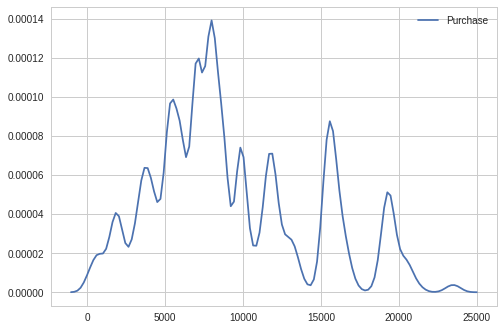

In [36]:
sns.kdeplot(train.Purchase);

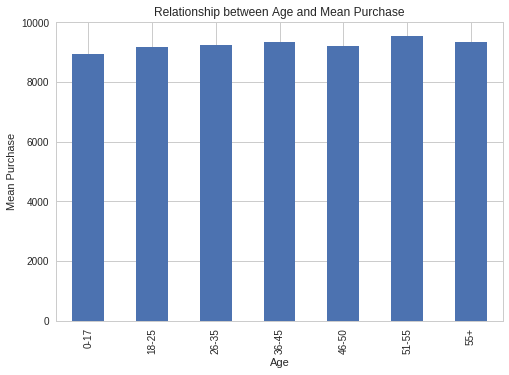

In [14]:
train.groupby('Age')['Purchase'].mean().plot(kind='bar')
plt.ylabel('Mean Purchase')
plt.title('Relationship between Age and Mean Purchase');

In [43]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

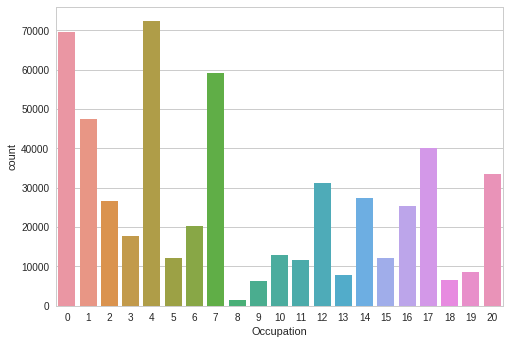

In [4]:
sns.countplot(x='Occupation', data=train);

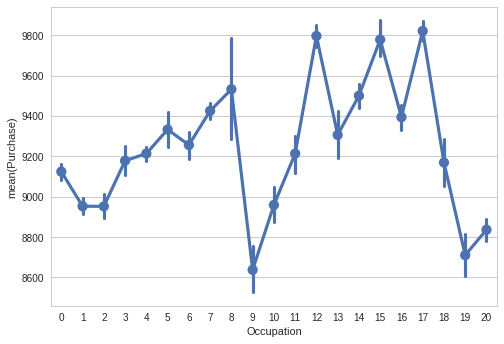

In [3]:
sns.pointplot(x='Occupation', y='Purchase', data=train);

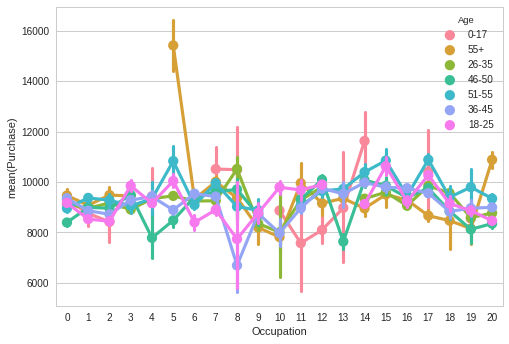

In [48]:
sns.pointplot(x="Occupation", y="Purchase", hue="Age", data=train, estimator=np.mean);

In [61]:
train.loc[(train.Age == '55+') & (train.Occupation == 5), :]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
93474,1002388,P00114942,M,55+,5,C,1,0,1,15.0,16.0,15555
132529,1002388,P00044442,M,55+,5,C,1,0,1,16.0,NaN,15257
170964,1002388,P00147942,M,55+,5,C,1,0,1,16.0,NaN,15448
210204,1002388,P00173842,M,55+,5,C,1,0,1,2.0,15.0,11539
249267,1002388,P00080342,M,55+,5,C,1,0,1,6.0,8.0,19061
249268,1002388,P00113142,M,55+,5,C,1,0,1,5.0,12.0,19291
327344,1002388,P00121342,M,55+,5,C,1,0,1,5.0,18.0,15909
327345,1002388,P00341342,M,55+,5,C,1,0,1,8.0,17.0,11535
327346,1002388,P00274242,M,55+,5,C,1,0,1,NaN,NaN,15195
366435,1002388,P00113342,M,55+,5,C,1,0,1,8.0,17.0,15329


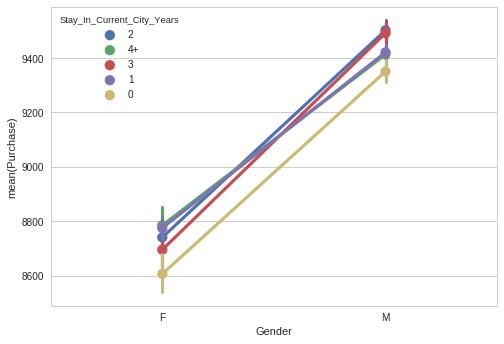

In [42]:
sns.pointplot(x="Gender", y="Purchase", hue="Stay_In_Current_City_Years", data=train, estimator=np.mean);

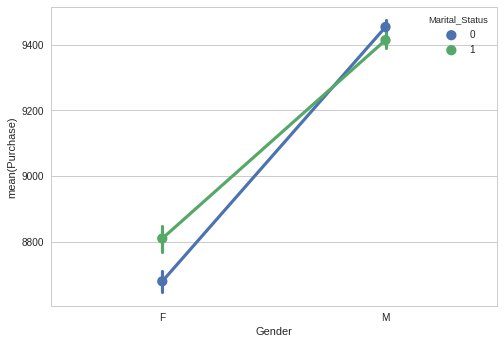

In [40]:
sns.pointplot(x="Gender", y="Purchase", hue="Marital_Status", data=train, estimator=np.mean);

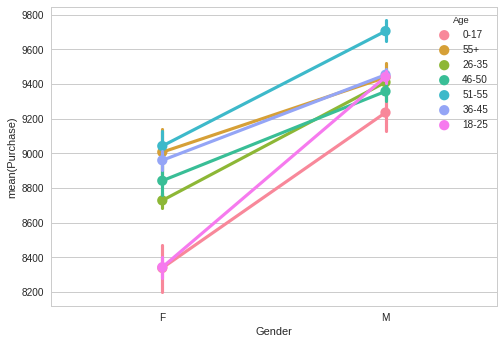

In [37]:
sns.pointplot(x="Gender", y="Purchase", hue="Age", data=train, estimator=np.mean);

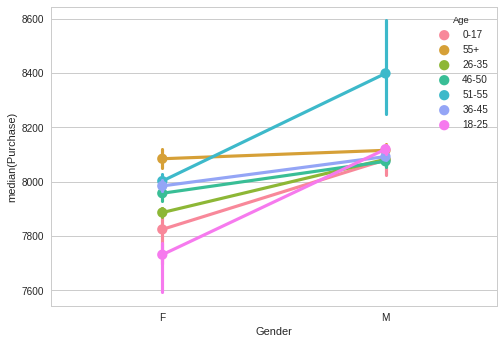

In [17]:
sns.pointplot(x="Gender", y="Purchase", hue="Age", data=train, estimator=np.median);

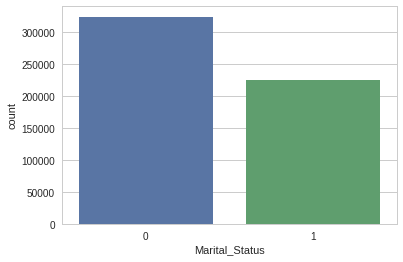

In [55]:
sns.countplot(x='Marital_Status', data=train);

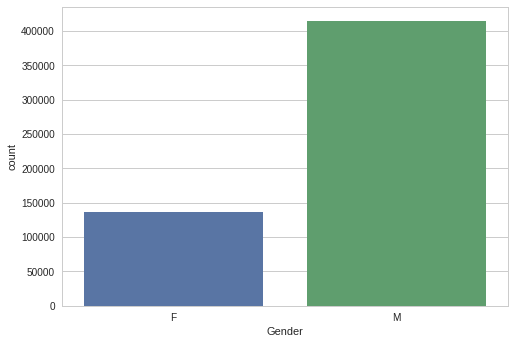

In [20]:
sns.countplot(x="Gender", data=train);

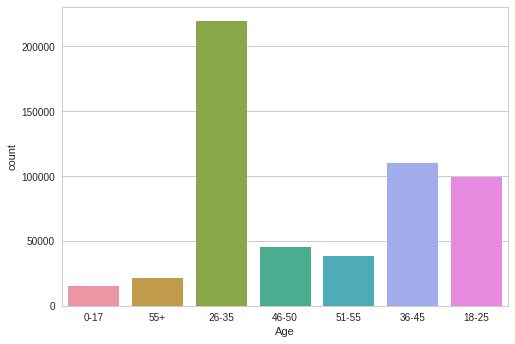

In [21]:
sns.countplot(x='Age', data=train);

In [13]:
# To capture relationship between different users and products that they get attracted to
# we can plot pivot table to see if there is any relationship between age segments and purchase amount.

ss = pd.pivot_table(train, index=['Gender', 'Marital_Status', 'Age'], columns='Product_Category_1', values='Purchase', fill_value=0)

In [38]:
def plot_diff_purchase_pattern(pivot_df, key1, key2, label):
    """
    Pivot Table with index as (Gender, Marital Status and Age)
    and Column is Product_Category_1 with Purchase as the value.
    
    So for every product category we can see the change in purchase ability
    based on the keys passed.
    """
    
    (ss.ix[key1] - ss.ix[key2]).plot(label=label)

In [30]:
train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], dtype=object)

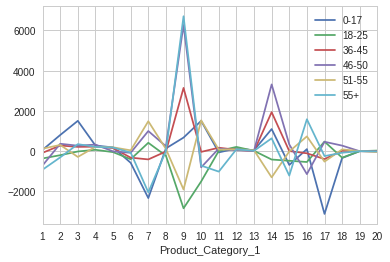

In [54]:
plot_diff_purchase_pattern(ss, ('F', 0, '0-17'), ('M', 0, '0-17'), '0-17')
plot_diff_purchase_pattern(ss, ('F', 0, '18-25'), ('M', 0, '18-25'), '18-25')
plot_diff_purchase_pattern(ss, ('F', 0, '36-45'), ('M', 0, '36-45'), '36-45')
plot_diff_purchase_pattern(ss, ('F', 0, '46-50'), ('M', 0, '46-50'), '46-50')
plot_diff_purchase_pattern(ss, ('F', 0, '51-55'), ('M', 0, '51-55'), '51-55')
plot_diff_purchase_pattern(ss, ('F', 0, '55+'), ('M', 0, '55+'), '55+')
plt.xticks(np.arange(1, 21))
plt.legend(loc='best');

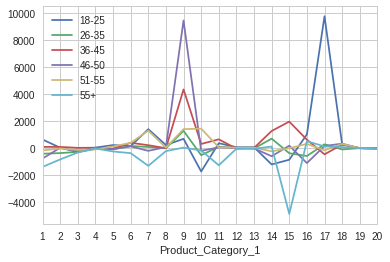

In [51]:
plot_diff_purchase_pattern(ss, ('F', 0, '18-25'), ('F', 1, '18-25'), '18-25')
plot_diff_purchase_pattern(ss, ('F', 0, '26-35'), ('F', 1, '26-35'), '26-35')
plot_diff_purchase_pattern(ss, ('F', 0, '36-45'), ('F', 1, '36-45'), '36-45')
plot_diff_purchase_pattern(ss, ('F', 0, '46-50'), ('F', 1, '46-50'), '46-50')
plot_diff_purchase_pattern(ss, ('F', 0, '51-55'), ('F', 1, '51-55'), '51-55')
plot_diff_purchase_pattern(ss, ('F', 0, '55+'), ('F', 1, '55+'), '55+')
plt.xticks(np.arange(1, 21))
plt.legend(loc='best');

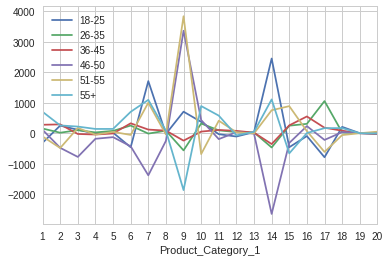

In [52]:
plot_diff_purchase_pattern(ss, ('M', 0, '18-25'), ('M', 1, '18-25'), '18-25')
plot_diff_purchase_pattern(ss, ('M', 0, '26-35'), ('M', 1, '26-35'), '26-35')
plot_diff_purchase_pattern(ss, ('M', 0, '36-45'), ('M', 1, '36-45'), '36-45')
plot_diff_purchase_pattern(ss, ('M', 0, '46-50'), ('M', 1, '46-50'), '46-50')
plot_diff_purchase_pattern(ss, ('M', 0, '51-55'), ('M', 1, '51-55'), '51-55')
plot_diff_purchase_pattern(ss, ('M', 0, '55+'), ('M', 1, '55+'), '55+')
plt.xticks(np.arange(1, 21))
plt.legend(loc='best');